<div style="background-color: #f8d7da; color: #721c24; padding: 20px; margin-bottom: 20px; border: 1px solid #f5c6cb; border-radius: 4px;">
    <strong style="font-size: 24px;">Warning</strong> <br> 
    <strong>You have launched the 000.1-ContactData_Preprocessing.ipynb.</strong>
    <ul style="color: #721c24;">
        <li>This notebook runs with a <strong>Python 3.6+</strong> kernel!</li>
        <li>It loads raw data from joint wave1 and wave2 (check dependencies if rerun is needed)</li>
        <li><strong>It outputs processed data overwriting existing files<strong>: please use this with caution.</li>
    </ul>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from utils import *

%config InlineBackend.figure_format = 'retina'

In [2]:
### Preparing age group splitting (commented rows transform to string all the age group content)
aGroups = [5*i for i in range(15)]+[110]
aGroups10 = [10*i for i in range(8)]+[110]
aGroup_map = {}
aGroup_map_10 = {}
for i,lim in enumerate(aGroups[1:-1]):
    aGroup_map['['+str(aGroups[i])+', '+str(lim)+')'] = str(aGroups[i])+'-'+str(lim-1)+' y'
aGroup_map['['+str(aGroups[-2])+', '+str(aGroups[-1])+')'] = str(aGroups[-2])+'+ y'
for i,lim in enumerate(aGroups10[1:-1]):
    aGroup_map_10['['+str(aGroups10[i])+', '+str(lim)+')'] = str(aGroups10[i])+'-'+str(lim-1)+' y'
aGroup_map_10['['+str(aGroups10[-2])+', '+str(aGroups10[-1])+')'] = str(aGroups10[-2])+'+ y'

### Loading original data
as_is = pd.read_excel('New_Bocconi FBK_SocialContactsDuringCovid_7.8.2023_CODES.xlsx', na_values=['#NULL!','__NA__'])
EPImap = as_is[['EPID']].drop_duplicates().reset_index(drop=True).reset_index().rename(columns={'index':'RecordNo'}).set_index('EPID')['RecordNo'].to_dict()

df = as_is.copy()
df['RecordNo'] = df['EPID'].map(EPImap)
df['sample_w'] = df['EPID'].map((np.abs(df.groupby('EPID')['caseid'].count()-3)).to_dict())


############################
### ADDED 10 / 11 / 2025 ###
df.loc[(df['wave']==2)& (df['sample_w']==1),'respondent_age'] = df.loc[(df['wave']==2)& (df['sample_w']==1),'respondent_age'] + 1
############################

df = df.rename(columns={'gender':'adult_gender'})
original_columns = df.columns.tolist() + ['age_group', 'age_group_10', 'respondent_sample']
new_cols_dict = {col:"c_"+col.split('_')[1]+'_other_'+col.split('other')[-1] for col in df.columns if ('other' in col.split('_')[-1])&(col.split('other')[-1].isdigit())}
df = df.rename(columns = new_cols_dict)
df['age_group'] = pd.cut(df['respondent_age'],aGroups,right=False)
df['age_group_10'] = pd.cut(df['respondent_age'],aGroups10,right=False)
df['age_group'] = df['age_group'].apply(lambda x: str(x)).map(aGroup_map).astype(str)
df['age_group_10'] = df['age_group_10'].apply(lambda x: str(x)).map(aGroup_map_10).astype(str)

df['respondent_sample'] = df['sample_w'].copy().map({1:'recontact', 2:'fresh'})
for i in range(2,14):
    # pipe-in contact_name of recontact's cohabitants
    df[f'c_conviventi_name_{i}_1'] = np.where((df['wave']==2)&(df['respondent_sample']=='recontact'), df[f'c_conviventi_name_{i}_1_w1'], df[f'c_conviventi_name_{i}_1'])


In [3]:
## Check and get EPIDs from version 56 respondent
w2r = df[(df['sample_w2']==1)]['EPID'].tolist()
w1 = df[(df['version']>=58)&(df['wave']==1)]['EPID'].tolist()
print(len(set(w2r).difference(set(w1))))
v56_EPID = df[df['EPID'].isin(set(w2r).difference(set(w1)))]['EPID'].drop_duplicates().tolist()
df[df['EPID'].isin(set(w2r).difference(set(w1)))][['version','wave','EPID','caseid']]
# df[df['EPID'].isin(set(w2r).difference(set(w1)))].to_csv('recontact_version_56.csv')

18


,version,wave,EPID,caseid
332,56,1,MN7BZYPATURTUYFC7NLSJ56CWU,1518138369
334,56,1,KF5PX7LB5OVJSP32FPGKR43XJQ,1520583733
335,56,1,7MMD3VHOHHNJYBDOPTY2RWEWT4,1520581867
338,56,1,SJTPSGRWNMJJK4CAP4KAPWT6XE,1520581919
339,56,1,CZEBDYWOPMLDJ32NP4W4WXU2VA,1520509633
340,56,1,TQNW5NZ437RPFZPP3H7IXFWVSI,1518999253
341,56,1,MUGQKCGWQ7CMG4IDQOI7O45KUU,1520581963
342,56,1,FKJM26RVQET2BWN3O3BUDLMVCY,1520581991
343,56,1,H63HYUDM2E7DKN6G6XVQIZET5M,1520277495
344,56,1,ERXYG6OOFKDX3376XQI62JXMS4,1520590387


In [4]:
# df_time = df[[i for i in df.columns if "_timing" in i]]
# df_time.describe().T.dropna().to_csv('FL_describe_timing.csv')

# Social Contacts 2023-03-30
## _Preliminary processing_

In [5]:
# yg_contacts = pd.read_csv('SAV for IT26162171_FBK_Bocconi_Social_Contact_Survey_Italy_internal.csv')

In [6]:
df_recent = df[((df['version']>=58)&(df['wave']==1))|((df['version'].isin([4,5,30,34]))&(df['wave']==2))].copy() # all wave 2 versions are. good [4,5,30,34]
df_recent = df_recent[~df_recent['EPID'].isin(v56_EPID)]
df_recent.columns = original_columns
df_recent = df_recent[[col for col in original_columns if 'timing' not in col]]
df_recent = df_recent.rename(columns={'istruzione':'education'})
# computing number of elder cohabitant
senior_ages = [65,70,75,80]
mask = df_recent[[c for c in df_recent.columns if ('conviventi_check_2' in c)]].replace(0,np.nan).notna()
for senior_age in senior_ages:
    df_recent[f'senior{senior_age}_cohabitant'] = (
        (df_recent[[c for c in df_recent.drop(columns=['respondent_age']).columns if ('conviventi_eta' in c)|
                                                                                    (('_age' in c)&('pipe_' in c))]]
        .replace(999,np.nan)>senior_age)
       .sum(1) -
       (df_recent[[c for c in df_recent.columns if (('_age' in c)&('pipe_' in c))]]
        .replace(999,np.nan)>senior_age)
       .where(mask.values,np.nan)
       .sum(1)
      )

In [7]:
def age_mapping_func(respondent):
    respondent_type = respondent['respondent_type']
    respondent_sample = respondent['respondent_sample']
    wave = respondent['wave']
    if respondent_type == 1:   conviventi_suffix = '013yo'
    elif respondent_type == 2: conviventi_suffix = '1417yo'
    elif respondent_type == 3: conviventi_suffix = '18'
    # if respondent is recontact in W2 we fill cohabitant ages from piped-in columns
    if (wave==2)&(respondent_sample=='recontact'):
        cols = (
            ['RecordNo','caseid'] + 
            [f'c_eta_{i}_1' for i in range(1,151)] + 
            ['age'] + 
            [f'pipe_c_conviventi_name_{i}_age' for i in range(2,14)] + 
            [f'conviventi_eta_{conviventi_suffix}_wave2_{i}_1' for i in range(1,8)]
        )
    # else, we map directly age from designed columns
    else:
        cols =  (
            ['RecordNo','caseid'] + 
            [f'c_eta_{i}_1' for i in range(1,151)] + 
            ['age'] +
            [f'childages_{i}' for i in range(1,6)] +
            [f'conviventi_eta_{conviventi_suffix}_{i}_1' for i in range(1,8)] + 
            [f'conviventi_eta_{conviventi_suffix}_wave2_{i}_1' for i in range(1,8)]
        )
    age_out = respondent[cols].astype(float).copy()

    age_out.index = ['RecordNo','caseid'] + [f'c_eta_{i}' for i in range(1,171)]
    return age_out
# questa funzione mappa anche i genitori del respondent come potenziali contatti -> la colonna su cui selezionare se uno è effettivamente contatto è "contacts_name" -> se np.nan => non c'è contatto con l'individuo _n

def map_istat_age(x): 
    if (x<=14):           return '14-'
    elif (x<=19)&(x>=15): return '15-19'
    elif (x>=20)&(x<=24): return '20-24'
    elif (x>=25)&(x<=29): return '25-29'
    elif (x>=30)&(x<=34): return '30-34'
    elif (x>=35)&(x<=39): return '35-39'
    elif (x>=40)&(x<=44): return '40-44'
    elif (x>=45)&(x<=49): return '45-49'
    elif (x>=50)&(x<=54): return '50-54'
    elif (x>=55)&(x<=59): return '55-59'
    elif (x>=60)&(x<=64): return '60-64'
    elif (x>=65):         return '65+'
####################################################
def age_vacc_group_map(x): 
    if (x<=4):           return '00-04'
    elif (x<=11)&(x>=5): return '05-11'
    elif (x>=12)&(x<=19): return '12-19'
    elif (x>=20)&(x<=29): return '20-29'
    elif (x>=30)&(x<=39): return '30-39'
    elif (x>=40)&(x<=49): return '40-49'
    elif (x>=50)&(x<=59): return '50-59'
    elif (x>=60)&(x<=69): return '60-69'
    elif (x>=70)&(x<=79): return '70-79'
    elif (x>=80)&(x<=89): return '80-89'
    elif (x>=90): return '90+'
def map_vacc_age_na(x):
    if (x[0] == 1)|(x[0] == 2): return (str(int(x[0])),x[1])
    else: return np.nan

istat_age_map_dict = {
  'Y15-19':'15-19', 'Y20-24':'20-24', 'Y25-29':'25-29', 'Y30-34':'30-34',
  'Y35-39':'35-39', 'Y40-44':'40-44', 'Y45-49':'45-49', 'Y50-54':'50-54',
  'Y55-59':'55-59', 'Y60-64':'60-64', 'Y_GE65':'65+'}

In [8]:
locations = (
  ['c_conviventi', 
  'c_home', 
  'c_work',
  'c_school', 
  'c_homeguest', 
  'c_restaurant', 
  'c_leisure',
  'c_shopping', 
  'c_transport', 
  'c_otherindoor',
  'c_otheroutdoor']
)

contact_location_cols = ([col for col in df_recent.columns if 
                          (any(loc in col for loc in locations))&
                          (~(col.split('_other')[-1].isdigit()))&
                          ('timing' not in col)&
                          ('conviventi_name' not in col)&
                          ('_966' not in col)])
contact_location_cols = contact_location_cols[20:] + contact_location_cols[:20] ### these columns changed from Wave1 to Wave2 (Wave1 only had 13 "conviventi" columns)
contact_name_cols = ['_'.join(col.split("_")[:-1])+'_other'+col.split("_")[-1] for col in contact_location_cols[:150]] + ['_'.join(col.split("_")[:2])+'_name_'+'_'.join(col.split("_")[2:])+'_1' for col in contact_location_cols[150:]]
contact_name_cols[150] = 'c_conviventi_1'

contact_location_dict = {i+1:col for i,col in enumerate(contact_location_cols)}
contact_name_dict = {i+1:col for i,col in enumerate(contact_name_cols)}


contact_info_cols = ['chiuso','c_fisico','c_mascherina','c_reddito_percepito','c_istruzione',
                     'c_relazione','c_frequenza','c_gender','c_distanza','c_vaccino','contacts_name']
idx_cols = ['RecordNo','caseid', 'respondent_age']


/var/folders/37/srrcmpqx22j0qx7gjc4j7x3r0000gq/T/ipykernel_15113/1280684095.py:17: DeprecationWarning: Bitwise inversion '~' on bool is deprecated and will be removed in Python 3.16. This returns the bitwise inversion of the underlying int object and is usually not what you expect from negating a bool. Use the 'not' operator for boolean negation or ~int(x) if you really want the bitwise inversion of the underlying int.
  (~(col.split('_other')[-1].isdigit()))&


In [9]:
####################################################
# computing contacts Table
contacts = pd.DataFrame(index=df_recent['caseid'], data=[[i for i in range(1,171)] for j in range(len(df_recent['caseid']))]).stack().reset_index()
contacts = (contacts.rename(columns={0:'contact_number'})
                    .merge(df_recent[idx_cols], on='caseid')[idx_cols+['contact_number']]
                    .astype(int))
contact_cols = []
for col_group in contact_info_cols:
    # select group of contact info
    tmp_group = (df_recent.set_index(idx_cols)[[col for col in df_recent.columns if col_group in col]]
                        .stack(dropna=False)
                        .reset_index())
    # process and tranform to int
    tmp_group['contact_number'] = tmp_group[f'level_{len(idx_cols)}'].apply(lambda x: x.split('_')[-1])
    # tmp_group['c_name'] = tmp_group[f'level_{len(idx_cols)}'].apply(lambda x: x.split('_')[-1])
    tmp_group = tmp_group[idx_cols+['contact_number',0]].rename(columns={0:col_group}).astype(float)
    # merge data to exploded contact dataframe
    contacts = contacts.merge(tmp_group, on=idx_cols+['contact_number'], how='left')
    contact_cols += [col for col in df_recent.columns if col_group in col]

# Add textual "contacts_name" as "c_name" in contacts dataset
tgroup = (df_recent.set_index(idx_cols)[[col for col in contact_name_cols]]
                    .stack(dropna=False)
                    .reset_index())
# # process and match to contact_number
tgroup['contact_number'] = tgroup[f'level_{len(idx_cols)}'].map({v:k for k,v in contact_name_dict.items()})
tgroup = tgroup[idx_cols+['contact_number',0]].rename(columns={0:'c_name'})
tgroup['c_name'] = tgroup['c_name'].replace({1:'parent',2:'parent'})

contacts = contacts.merge(tgroup, on=idx_cols+['contact_number'], how='left')
contact_cols += [col for col in contact_name_cols]



# ### Generate "respondent_info" dataframe
respondent_info = df_recent[[col for col in df_recent.columns if (col not in contact_cols)&(not any(loc in col for loc in locations))&(not any(eta in col for eta in ['c_eta_','conviventi_eta_','childages_']))]].copy()
respondent_info['vacc_covid_all'] = respondent_info['vacc_covid'].fillna(respondent_info['vacc_covid2'])
respondent_info['vaccino'] = respondent_info['vacc_covid_all'].map({1:2,2:2,3:2,4:1,5:1,6:1,7:1,955:np.nan}) # 2 = no_vax, 1 = with at least 1 dose
respondent_info['education'] = respondent_info['education'].replace(4,np.nan)
respondent_info['compilazione_contatti_first_clicked'] = respondent_info['compilazione_contatti_first_clicked'].astype(float)
respondent_info['compile_contacts'] = respondent_info['compilazione_contatti_first_clicked'].map({1:1,2:0,3:0})
respondent_info['children'] = respondent_info['respondent_type'].map({1:1,2:1,3:2})
respondent_info['children_number'] = df_recent[[c for c in df_recent.columns if "childages_" in c]].count(1)

/var/folders/37/srrcmpqx22j0qx7gjc4j7x3r0000gq/T/ipykernel_15113/1110152503.py:11: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(dropna=False)
/var/folders/37/srrcmpqx22j0qx7gjc4j7x3r0000gq/T/ipykernel_15113/1110152503.py:11: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(dropna=False)
/var/folders/37/srrcmpqx22j0qx7gjc4j7x3r0000gq/T/ipykernel_15113/1110152503.py:11: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=

In [10]:
#### Processing PATOLOGIE CRONICHE (chronic_diseases) and PATOLOGIE ACUTE (acute_diseases) ####
# generating a boolean column whic returns true if respondent/r-cohabitant has a set of chronic/acute diseases, false if not
# to change the set of diseases included change the encoded answers in the list below
chronic_list = [5,6,7,10,14] # [2,3,4,6,8,9,11,12,13,955,5,7,10,14,15,16]
acute_list = [2,3,4,5,6,7,8,9,10,11,12,13,14, 955]
multiple_answer_cols = ['patologie_croniche','patologie_croniche_cohabitant']#,'patologie_acute','patologie_acute_cohabitant']
for multiple_answer_col in multiple_answer_cols:
    list_cols = [col for col in respondent_info.columns if (multiple_answer_col in col)&(len(col.split('_'))==len(multiple_answer_col.split('_'))+1)&(col.split('_')[-1]!='1')&(not '_977' in col)]
    tmp = respondent_info.set_index('caseid')[list_cols].replace(0,np.nan)
    tmp.columns = [int(col.split('_')[-1]) for col in tmp.columns]
    if 'croniche' in multiple_answer_col: tmp = tmp[chronic_list]
    else:                                 tmp = tmp[acute_list]
    # raise Exception('Pause')
    respondent_info['has_'+multiple_answer_col+'_0'] = (tmp.sum(1)!=0).values
    ### 0-1-np.nan indicating wether somene didn't have any cohabitant with comorb (0) or she has (1),  977 or people without cohabitant are marked as nan
    respondent_info[multiple_answer_col] = pd.Series(np.nansum([respondent_info.set_index('caseid')[multiple_answer_col+'_1'].replace(0,np.nan).values-2,respondent_info.set_index('caseid')[list_cols].replace(0,np.nan).max(1).values],0)).replace(0,np.nan).replace(-1,0).values


In [11]:
####################################################
### Processing contacts' age
# parse columns
ages = df_recent.apply(age_mapping_func, axis=1).set_index(['RecordNo','caseid']).stack(dropna=False).reset_index()
ages['contact_number'] = ages['level_2'].apply(lambda x: x.split('_')[-1]).astype(int)
ages = ages.drop(columns=['level_2']).rename(columns={0:'c_eta'})

## update contacts adding age, istruzione and...(whatever you want)
contacts = contacts.merge(ages, on=['RecordNo','caseid','contact_number'], how='left')
RecordNo = contacts['RecordNo'].values
contacts = contacts.replace([977,955,933],np.nan)
contacts['RecordNo'] = RecordNo
# contacts_name* is 1 if that contact cell had a name inserted, 0 if cell didn't have a name but respondent had at least 1,
# contacts_name* are filled with nans otherwise. Below, we equiparate zeroes to nans replacing the former with the latter.
contacts['contacts_name'] = contacts['contacts_name'].replace(0,np.nan)
contacts = contacts.merge(df_recent[idx_cols+['total_contacts']].rename(columns={'total_contacts':'total_contacts_yg'}), on=idx_cols)

contacts['total_contacts'] = contacts.groupby(idx_cols)['contacts_name'].transform(pd.Series.sum)
contacts['location'] = contacts['contact_number'].map(contact_location_dict)
contacts['location'] = contacts['location'].apply(lambda x: str(x).split('_')[1])
contacts['c_location'] = contacts['location'].copy()
contacts['c_chiuso'] = contacts['chiuso'].copy()

# map c_mascherina values into separate columns for respondent and contact
contacts['mask'] = contacts['c_mascherina'].map({1:2,2:1,3:2,4:1,np.nan:np.nan})   # 2 = no_mask, 1 = mask
contacts['c_mask'] = contacts['c_mascherina'].map({1:2,2:2,3:1,4:1,np.nan:np.nan})
# automatically fill "relazione" for "conviventi"
contacts.loc[contacts[(contacts['c_relazione'].isna())&(contacts['location']=='conviventi')].index,'c_relazione'] = 1
# automatically fill "c_distanza" for "fisico" contacts type
contacts.loc[contacts[contacts['c_fisico']==1].index, 'c_distanza'] = 0

# map respondent columns in contact dataframe
for respondent_col in ['education','respondent_gender','vaccino','reddito_percepito','covid','wave','respondent_sample'] + ['has_'+col+'_0' for col in multiple_answer_cols]:
    contacts[respondent_col] = contacts['caseid'].map(respondent_info.set_index('caseid')[respondent_col].to_dict())
    if respondent_col=='education':
        contacts.loc[contacts[contacts['respondent_age']<18].index,respondent_col] = 1
    
contacts = contacts.rename(columns={'c_istruzione':'c_education'})

#### Groups
aGroups_list = [aGroups, aGroups10]
aGroups_maps = [aGroup_map, aGroup_map_10]
for i,age_group in enumerate(['','_10']):
    contacts['age_group'+age_group] = pd.cut(contacts['respondent_age'],aGroups_list[i],right=False).values
    contacts['age_group'+age_group] = contacts['age_group'+age_group].apply(lambda x: str(x)).map(aGroups_maps[i])
    contacts['age_group'+age_group] = contacts['age_group'+age_group].astype(str)
    contacts['c_age_group'+age_group] = pd.cut(contacts['c_eta'],aGroups_list[i],right=False).values
    contacts['c_age_group'+age_group] = contacts['c_age_group'+age_group].apply(lambda x: str(x)).map(aGroups_maps[i])
    contacts['c_age_group'+age_group] = contacts['c_age_group'+age_group].astype(str)

contacts['mask_group'] = contacts.apply(lambda x: str(x['mask'])+'-'+str(x['c_mask']), axis=1).map({'1.0-1.0':'both_masked','1.0-2.0':'respondent_masked','2.0-1.0':'contact_masked','2.0-2.0':'no-one_masked'})

contacts['in-out_group'] = contacts['chiuso'].map({1:'indoor',2:'outdoor'})
contacts['physical_group'] = contacts['c_fisico'].map({1:'physical',2:'non-physical'})
contacts['distance_group'] = contacts['c_distanza'].map({0:'0m', 1:'1m -',2:'1m - 2m',3:'2m +',np.nan:'n.d.'})
contacts['vaccine_group'] = contacts.apply(lambda x: str(x['vaccino'])+'-'+str(x['c_vaccino']), axis=1).map({'1.0-1.0':'both-vax','1.0-2.0':'respondent-vax','2.0-1.0':'contact_vax','2.0-2.0':'no-one-vax','nan-1.0':'rnd-contact-vax','nan-2.0':'rnd-contact-no-vax','1.0-nan':'respondent-vax-cnd','2.0-nan':'respondent-no-vax-cnd','nan-nan':'n.d.'})
contacts['income_group'] = contacts.apply(lambda x: str(x['reddito_percepito'])+'-'+str(x['c_reddito_percepito']), axis=1)
contacts['education_group'] = contacts.apply(lambda x: str(x['education'])+'-'+str(x['c_education']), axis=1)
contacts['gender_group'] = contacts.apply(lambda x: str(float(x['respondent_gender']))+'-'+str(x['c_gender']), axis=1).map({'1.0-1.0':'male-male','1.0-2.0':'male-female','2.0-1.0':'female-male','2.0-2.0':'female-female','1.0-nan':'male-n.d.','2.0-nan':'female-n.d.'})

/var/folders/37/srrcmpqx22j0qx7gjc4j7x3r0000gq/T/ipykernel_15113/88033941.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  ages = df_recent.apply(age_mapping_func, axis=1).set_index(['RecordNo','caseid']).stack(dropna=False).reset_index()


In [12]:
####################################################
#### Columnns with "_Na" appended are referring to italian population numbers for a specific population group
def zip_col_vals(x):
    nan_check = None
    for e in x.values:
        if pd.isna(e):      return np.nan
    if nan_check is None: return tuple(x.tolist())

# adding population by age_group for age contacts symmetrization
age = pd.read_csv('../data_in/age_gender.csv')
age = age[(age['Sesso']=='totale')&(age['Territorio']=='Italia')][['Età','Value']].iloc[:-1,:].reset_index(drop=True)
age['age'] = age['Età'].apply(lambda x: int(x.split(' ')[0]))
group_maps = {}
for i,age_group in enumerate(['','_10']):
    age['age_group'+age_group] = pd.cut(age['age'],aGroups_list[i],right=False)
    age['age_group'+age_group] = age['age_group'+age_group].apply(lambda x: str(x)).map(aGroups_maps[i]).astype(str)
    age1 = age.groupby('age_group'+age_group)[['Value']].sum().reset_index()

    contacts = contacts.merge(age1[['Value','age_group'+age_group]], on='age_group'+age_group).rename(columns={'Value':'age_group'+age_group+'_Na'})
    respondent_info = respondent_info.merge(age1[['Value','age_group'+age_group]], on='age_group'+age_group).rename(columns={'Value':'age_group'+age_group+'_Na'})
    group_maps['age_group'+age_group] =  age1.set_index('age_group'+age_group).to_dict()['Value']


# # adding population by age_group for age contacts symmetrization
age_group = age[['Età','Value','age']].copy()
age_group['age_group_vacc'] = age_group['age'].apply(age_vacc_group_map)
age_group = age_group.groupby('age_group_vacc')['Value'].sum().to_dict()
age = age.set_index('age')['Value'].to_dict()

# add vaccine population on second half of march
vax = pd.read_csv('../data_in/age_vaccine.csv', parse_dates=['ultimo_aggiornamento'])
vax = vax.groupby(['fascia_anagrafica'], as_index=False).mean().rename(columns={'fascia_anagrafica':'age_group_vacc'})
vax = vax.set_index('age_group_vacc').T
vax['00-04'] = 0
vax = vax.T.sort_index().reset_index()


age_vacc_map = {}
for k in vax['age_group_vacc'].unique():
    age_vacc_map['1_'+k] = vax.set_index('age_group_vacc')['prima_dose'].to_dict()[k]
    age_vacc_map['2_'+k] = age_group[k] - age_vacc_map['1_'+k]
    age_vacc_map[np.nan] = np.nan

vacc_map = {}
vacc_map[1.] = vax['prima_dose'].sum()
vacc_map[2.] = sum(age.values()) - vax['prima_dose'].sum()

# adding info to respondent and contacts dataframe
contacts['istat_age'] = contacts['respondent_age'].apply(map_istat_age)
contacts['c_istat_age'] = contacts['c_eta'].apply(map_istat_age)
respondent_info['istat_age'] = respondent_info['respondent_age'].apply(map_istat_age)

respondent_info['age_pop_Na'] = respondent_info['respondent_age'].map(age)
contacts['age_pop_Na'] = contacts['respondent_age'].map(age)

respondent_info['age_group_vacc'] = respondent_info['respondent_age'].apply(age_vacc_group_map)
contacts['age_group_vacc'] = contacts['respondent_age'].apply(age_vacc_group_map)
contacts['c_age_group_vacc'] = contacts['c_eta'].apply(age_vacc_group_map)
respondent_info['vacc_age'] = respondent_info[['vaccino','age_group_vacc']].apply(lambda x: map_vacc_age_na(x), axis=1)
contacts['vacc_age'] = contacts[['vaccino','age_group_vacc']].apply(lambda x: map_vacc_age_na(x), axis=1)
contacts['c_vacc_age'] = contacts[['c_vaccino','c_age_group_vacc']].apply(lambda x: map_vacc_age_na(x), axis=1)

respondent_info['age_gender'] = respondent_info[['istat_age','respondent_gender']].apply(lambda x: zip_col_vals(x), axis=1)
contacts['age_gender'] = contacts[['istat_age','respondent_gender']].apply(lambda x: zip_col_vals(x), axis=1)
contacts['c_age_gender'] = contacts[['c_istat_age','c_gender']].apply(lambda x: zip_col_vals(x), axis=1)
respondent_info['age_education'] = respondent_info[['istat_age','education']].apply(lambda x: zip_col_vals(x), axis=1)
contacts['age_education'] = contacts[['istat_age','education']].apply(lambda x: zip_col_vals(x), axis=1)
contacts['c_age_education'] = contacts[['c_istat_age','c_education']].apply(lambda x: zip_col_vals(x), axis=1)
respondent_info['gender_education'] = respondent_info[['respondent_gender','education']].apply(lambda x: zip_col_vals(x), axis=1)
contacts['gender_education'] = contacts[['respondent_gender','education']].apply(lambda x: zip_col_vals(x), axis=1)
contacts['c_gender_education'] = contacts[['c_gender','c_education']].apply(lambda x: zip_col_vals(x), axis=1)


respondent_info['vacc_age_Na'] = respondent_info['vacc_age'].map(age_vacc_map)
contacts['vacc_age_Na'] = contacts['vacc_age'].map(age_vacc_map)

respondent_info['vaccino_Na'] = respondent_info['vaccino'].map(vacc_map)
contacts['vaccino_Na'] = contacts['vaccino'].map(vacc_map)

respondent_info['response_date'] = respondent_info['end_date_module2A'].apply(lambda x: pd.Timestamp(x).date())
respondent_info['response_weekday'] = respondent_info['response_date'].apply(lambda x: x.weekday())


/var/folders/37/srrcmpqx22j0qx7gjc4j7x3r0000gq/T/ipykernel_15113/2674973671.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (x[0] == 1)|(x[0] == 2): return (str(int(x[0])),x[1])
/var/folders/37/srrcmpqx22j0qx7gjc4j7x3r0000gq/T/ipykernel_15113/2674973671.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (x[0] == 1)|(x[0] == 2): return (str(int(x[0])),x[1])
/var/folders/37/srrcmpqx22j0qx7gjc4j7x3r0000gq/T/ipykernel_15113/2674973671.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

In [13]:
####################################################
# adding age_groups, gender and education from istat
age_gender_education = pd.read_csv('../data_in/age_gender_istruzione.csv')

edu_map = {
  'licenza di scuola elementare, nessun titolo di studio':1.,
  'licenza di scuola media':1.,
  'diploma 2-3 anni (qualifica professionale)':2.,
  'diploma 4-5 anni (maturità)':2., 
  'laurea e post-laurea':3.
}
AGE = age_gender_education[(age_gender_education['Territorio']=='Italia')&
                           (age_gender_education['Seleziona periodo']=='2020')&
                           (age_gender_education['Sesso']!='totale')&
                           (age_gender_education['Titolo di studio']!='totale')].copy()
AGE = AGE[~(AGE['ETA1'].isin(['Y_GE15','Y15-24','Y25-34','Y35-64','Y15-64']))]
AGE['education'] = AGE['Titolo di studio'].map(edu_map)
AGE['respondent_gender'] = AGE['Sesso'].map({'maschi':1.,'femmine':2.})
AGE['istat_age'] = AGE['ETA1'].map(istat_age_map_dict)
AGE = ((AGE.groupby(['education','respondent_gender','istat_age'])[['Value']].sum())*1000).reset_index()
AGE = AGE.rename(columns={'Value':'AgeGenderEdu_Na'})

contacts = contacts.merge(AGE, on=['istat_age','respondent_gender','education'], how='left')
contacts['age_Na'] = contacts['istat_age'].map(contacts.drop_duplicates(['istat_age','respondent_gender','education']).groupby(['istat_age'])['AgeGenderEdu_Na'].sum().to_dict()).replace(0,np.nan)
contacts['gender_Na'] = contacts['respondent_gender'].map(contacts.drop_duplicates(['istat_age','respondent_gender','education']).groupby(['respondent_gender'])['AgeGenderEdu_Na'].sum().to_dict()).replace(0,np.nan)
contacts['education_Na'] = contacts['education'].map(contacts.drop_duplicates(['istat_age','respondent_gender','education']).groupby(['education'])['AgeGenderEdu_Na'].sum().to_dict()).replace(0,np.nan)

contacts['AgeGender_Na'] = contacts[['istat_age','respondent_gender']].apply(lambda x: zip_col_vals(x), axis=1)
contacts['AgeGender_Na'] = contacts['AgeGender_Na'].map(contacts.drop_duplicates(['istat_age','respondent_gender','education']).groupby(['istat_age','respondent_gender'])['AgeGenderEdu_Na'].sum().to_dict()).replace(0,np.nan)
contacts['AgeEdu_Na'] = contacts[['istat_age','education']].apply(lambda x: zip_col_vals(x), axis=1)
contacts['AgeEdu_Na'] = contacts['AgeEdu_Na'].map(contacts.drop_duplicates(['istat_age','respondent_gender','education']).groupby(['istat_age','education'])['AgeGenderEdu_Na'].sum().to_dict()).replace(0,np.nan)
contacts['GenderEdu_Na'] = contacts[['respondent_gender','education']].apply(lambda x: zip_col_vals(x), axis=1)
contacts['GenderEdu_Na'] = contacts['GenderEdu_Na'].map(contacts.drop_duplicates(['istat_age','respondent_gender','education']).groupby(['respondent_gender','education'])['AgeGenderEdu_Na'].sum().to_dict()).replace(0,np.nan)


In [14]:
### Drop "RecordNo" column before saving
contacts = contacts[contacts['contacts_name'].notna()].drop(columns=['RecordNo'])
respondent_info = respondent_info.drop(columns=['RecordNo'])

#### Adding useful columns (summaries from contact statistics)
respondent_info = respondent_info.set_index('caseid').sort_index()
contacts = contacts.sort_values('caseid')

respondent_info['total_contacts_outdoor_with_mask'] = contacts[(contacts['chiuso']==2)&(contacts['c_mascherina'].isin([1,2,3]))].groupby('caseid')['contact_number'].count()
respondent_info['total_contacts_outdoor_with_mask'] = respondent_info['total_contacts_outdoor_with_mask'].fillna(0)

respondent_info['total_contacts_indoor_with_mask'] = contacts[(contacts['chiuso']==1)&(contacts['c_mascherina'].isin([1,2,3]))].groupby('caseid')['contact_number'].count()
respondent_info['total_contacts_indoor_with_mask'] = respondent_info['total_contacts_indoor_with_mask'].fillna(0)

respondent_info['total_contacts_indoor_without_mask'] = contacts[(contacts['chiuso']==1)&(~contacts['c_mascherina'].isin([1,2,3]))].groupby('caseid')['contact_number'].count()
respondent_info['total_contacts_indoor_without_mask'] = respondent_info['total_contacts_indoor_without_mask'].fillna(0)


# total contacts per setting
for location in sorted(['conviventi', 'home', 'leisure', 'transport', 'otherindoor','school', 'homeguest', 'shopping', 'restaurant', 'otheroutdoor','work']):
    respondent_info[f'total_contacts_{location}'] = contacts[(contacts['location']==location)].groupby('caseid')['contact_number'].count()
    respondent_info[f'total_contacts_{location}'] = respondent_info[f'total_contacts_{location}'].fillna(0)


respondent_info = respondent_info.reset_index()
# checking number of cohabitants
respondent_info['cohabitants'] = respondent_info['EPID'].map(df_recent[['EPID','profile_household_size_EU']].dropna().set_index('EPID')['profile_household_size_EU'].to_dict()) - respondent_info[[c for c in respondent_info.columns if 'conviventi_check_2_' in c]].sum(1) + respondent_info['conviventi_check_3'].fillna(0)

In [15]:
### Saving processed data: 
# "contacts" contains one row for each contact (respondent who recorded the contact can be recovered from "EPID" or (uniquely for different waves) with "caseid")
# "respondent_info" contains one row for each respondent. columns are indicators for respondent socio-eco-demo-health variables
contacts[contacts['contacts_name'].notna()].to_csv('../data_in/contacts.csv',index=False)
respondent_info.to_csv('../data_in/respondent_info.csv',index=False)

# contacts.to_pickle('processed_contact_study/contacts.pkl')
# respondent_info.to_pickle('processed_contact_study/respondent_info.pkl')

# Data Cleaning and total_contacts_shareindoor

In [16]:
### Load processed complete data
cs = pd.read_csv('../data_in/contacts.csv')
rinfo = pd.read_csv('../data_in/respondent_info.csv', parse_dates=['starttime','endtime'])
rinfo['response_date'] = rinfo['start_date_module2A'].apply(pd.Timestamp).apply(lambda x: x.date())
rinfo['response_weekday'] = rinfo['response_date'].apply(lambda x: x.weekday())
rinfo['survey_date'] = rinfo['starttime'].apply(pd.Timestamp).apply(lambda x: x.date())
rinfo['survey_weekday'] = rinfo['survey_date'].apply(pd.Timestamp).apply(lambda x: x.weekday())
# rinfo = rinfo[rinfo['survey_date']!= "2023-02-28"]
### Load problematic survey records
load_problem_xlsx = f'Issues - contact categorization.xlsx'

problem_types = ['Duplicati','Luoghi_contesti','Plurali','Problemi vari','School_presence_administration']
problems = pd.read_excel(load_problem_xlsx, sheet_name=problem_types, usecols=['caseid'])

problem_epid = set(sum([epids['caseid'].tolist() for problem_name, epids in problems.items()],[]))
# filter respondent_info dataset
clean_rinfo = rinfo[~rinfo['caseid'].isin(problem_epid)]
# filter contacts dataset
clean_cs = cs[~cs['caseid'].isin(problem_epid)]
# save cleaned data
clean_cs.to_csv('../data_in/clean_contacts.csv',index=False)
clean_rinfo.to_csv('../data_in/clean_respondent_info.csv',index=False)


In [17]:
respondent_info.shape

(7318, 208)

In [18]:
clean_rinfo.shape

(6308, 210)

In [19]:
pre = respondent_info.groupby('wave')['caseid'].count()
post = clean_rinfo.groupby('wave')['caseid'].count()

In [20]:
print('pre-cleaning',pre,'\n')
print('post-cleaning',post,'\n')
print('difference',pre-post)

pre-cleaning wave
1    3486
2    3832
Name: caseid, dtype: int64 

post-cleaning wave
1    3114
2    3194
Name: caseid, dtype: int64 

difference wave
1    372
2    638
Name: caseid, dtype: int64


### Fast school analysis

<Axes: >

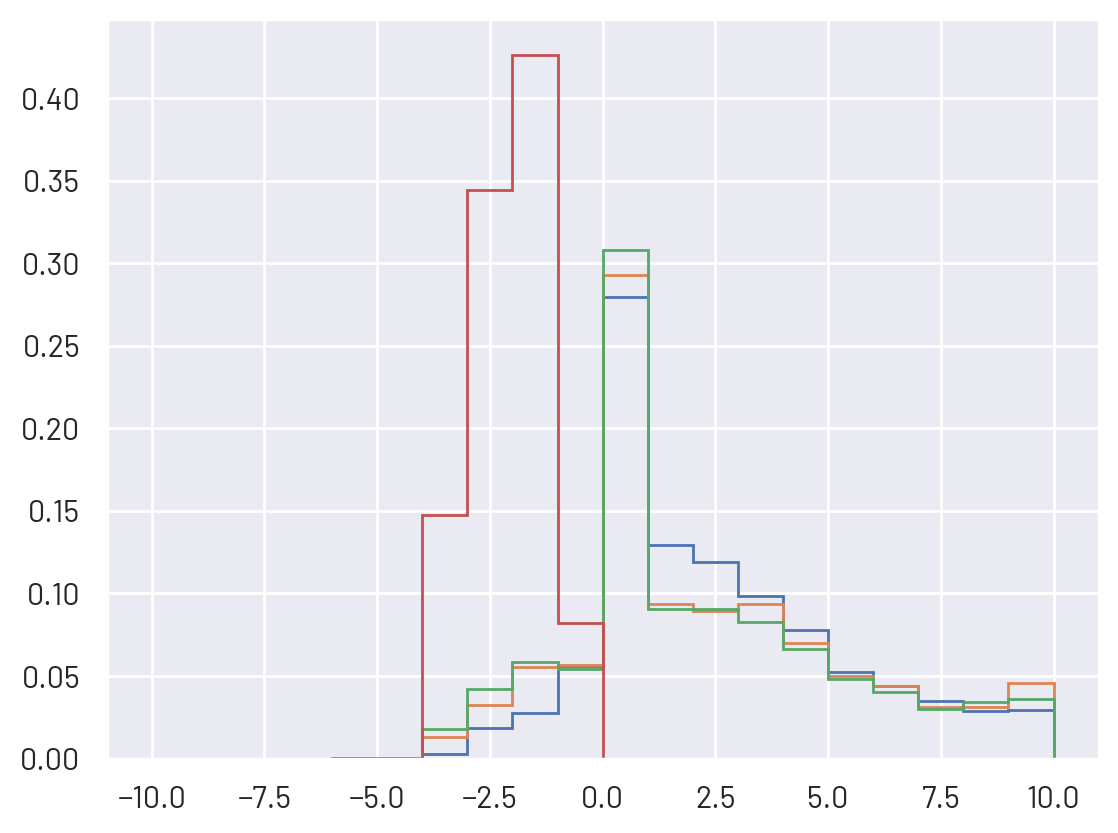

In [21]:
(clean_rinfo['total_contacts']- clean_rinfo['cohabitants']+1).hist(range=(-10,10),bins=20, density=True,histtype='step')

kiddos = clean_rinfo[clean_rinfo['respondent_age']<18]
(kiddos['total_contacts']- kiddos['cohabitants']+1).hist(range=(-10,10),bins=20, density=True,histtype='step')

kiddos = clean_rinfo[clean_rinfo['respondent_age']<13]
(kiddos['total_contacts']- kiddos['cohabitants']+1).hist(range=(-10,10),bins=20, density=True,histtype='step')

kiddos = clean_rinfo[(clean_rinfo['respondent_age']<13)&(clean_rinfo['total_contacts']==0)]
(kiddos['total_contacts']- kiddos['cohabitants']+1).hist(range=(-10,10),bins=20, density=True,histtype='step')

In [22]:
clean_rinfo[(clean_rinfo['presenza_school'].isna())&(~clean_rinfo['response_weekday'].isin([0,6]))&((clean_rinfo['occupazione'].isin([5,6,7]))|(clean_rinfo['occupazione_05']==1))&(clean_rinfo['isolamento'].isin([2,4]))][['respondent_age','occupazione_05','occupazione','response_weekday']] # REmoved from comlumns on 10/11/2025 'has_patologie_acute_0'

,respondent_age,occupazione_05,occupazione,response_weekday
642,0,2.0,6,3


In [31]:
def filter_students(df):
    filtered_df = (df[
        (df['isolamento'].isin([2,4]))&
        (((df['wave']==1)&
            (((df['respondent_age']<=5)&(df['occupazione_05']==1))|
             ((df['respondent_age']>5)&(df['respondent_age']<=13))|
             ((df['respondent_age']>13)&(df['respondent_age']<=15))|
             ((df['respondent_age']>15)&(df['respondent_age']<=18)&(df['occupazione'].isin([5,6,7])))|
             ((df['respondent_age']>18)&(df['occupazione'].isin([5,6,7])))))|
        ((df['wave']==2)&
            (((df['respondent_age']<=5)&(df['occupazione_05']==1)&(~df['survey_weekday'].isin([0,5])))|
             ((df['respondent_age']>5)&(df['respondent_age']<=13)&(~df['survey_weekday'].isin([0,5])))|
             ((df['respondent_age']>13)&(df['respondent_age']<=15)&(~df['survey_weekday'].isin([0,6])))|
             ((df['respondent_age']>15)&(df['respondent_age']<=18)&(df['occupazione'].isin([5,6,7]))&(~df['survey_weekday'].isin([0,6])))|
             ((df['respondent_age']>18)&(df['occupazione'].isin([5,6,7]))&(~df['survey_weekday'].isin([0,5]))))
            )
        )
        ].copy())
    return filtered_df

In [32]:
clean_rinfo = clean_rinfo[clean_rinfo['isolamento'].notna()]

In [33]:
bins = 20
range_b = (0,100)
clean_stud[clean_stud['presenza_school']==2]['c_sharedindoor'].hist(range=range_b,bins=bins, align='left',density=True, alpha=0.5, edgecolor='k',label='went to school')
clean_stud[clean_stud['presenza_school']!=2]['c_sharedindoor'].hist(range=range_b,bins=bins, align='left',density=True, alpha=0.5, edgecolor='k',label='did not go to school')
plt.yscale('symlog',linthresh=0.02)
plt.ylabel('density of respondents', fontweight='black')
plt.xlabel('\"mass\" contacts', fontweight='black')
plt.legend()
plt.title('Students indoor prolonged contacts by school frequentation')

NameError: name 'clean_stud' is not defined

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

bins = 20
range_b = (0,100)

# minor
clean_rinfo[(clean_rinfo['respondent_age']<18)]['c_sharedindoor'].hist(range=range_b,bins=bins, align='left',density=True, alpha=0.5, edgecolor='k',label='minors', ax=ax[0])
# adults
clean_rinfo[(clean_rinfo['respondent_age']>=18)]['c_sharedindoor'].hist(range=range_b,bins=bins, align='left',density=True, alpha=0.5, edgecolor='k',label='adults', ax=ax[0])

ax[0].legend()
ax[0].set_yscale('symlog',linthresh=0.01)


# workers
(clean_rinfo[((clean_rinfo['respondent_age']>=16)&
              (clean_rinfo['occupazione'].isin([1,2,3])))
           ]['c_sharedindoor']
 .hist(range=range_b,bins=bins, align='left',density=True, alpha=0.5, edgecolor='k',label='workers', ax=ax[1])
)
# students
(clean_rinfo[((clean_rinfo['respondent_age']<16)&(clean_rinfo['respondent_age']>5))|
            ((clean_rinfo['respondent_age']>=16)&(clean_rinfo['occupazione'].isin([5,6,7])))|
            ((clean_rinfo['respondent_age']<=5)&(clean_rinfo['occupazione_05']==1))
           ]['c_sharedindoor']
 .hist(range=range_b,bins=bins, align='left',density=True, alpha=0.5, edgecolor='k',label='students', ax=ax[1])
)
# unemployed/retired/inactive
(clean_rinfo[~(((clean_rinfo['respondent_age']<16)&(clean_rinfo['respondent_age']>5))|
            ((clean_rinfo['respondent_age']>=16)&(clean_rinfo['occupazione'].isin([1,2,3,5,6,7])))|
            ((clean_rinfo['respondent_age']<=5)&(clean_rinfo['occupazione_05']==1)))
           ]['c_sharedindoor']
 .hist(range=range_b,bins=bins, align='left',density=True, alpha=0.5, edgecolor='k',label='inactive/unemployed/retired', ax=ax[1])
)

ax[1].legend()
ax[1].set_yscale('symlog',linthresh=0.01)

ax[0].set_ylabel('density of respondents', fontweight='black')
ax[1].set_ylabel('density of respondents', fontweight='black')
ax[0].set_xlabel('\"mass\" contacts', fontweight='black')
ax[1].set_xlabel('\"mass\" contacts', fontweight='black')

In [ ]:
minors = clean_rinfo[(clean_rinfo['respondent_age']<18)]
adults = clean_rinfo[(clean_rinfo['respondent_age']>=18)]

# workers
work = (clean_rinfo[((clean_rinfo['respondent_age']>=16)&
              (clean_rinfo['occupazione'].isin([1,2,3])))])
# students
stud = (clean_rinfo[((clean_rinfo['respondent_age']<16)&(clean_rinfo['respondent_age']>5))|
            ((clean_rinfo['respondent_age']>=16)&(clean_rinfo['occupazione'].isin([5,6,7])))|
            ((clean_rinfo['respondent_age']<=5)&(clean_rinfo['occupazione_05']==1))
           ])

inactive = (clean_rinfo[~(((clean_rinfo['respondent_age']<16)&(clean_rinfo['respondent_age']>5))|
            ((clean_rinfo['respondent_age']>=16)&(clean_rinfo['occupazione'].isin([1,2,3,5,6,7])))|
            ((clean_rinfo['respondent_age']<=5)&(clean_rinfo['occupazione_05']==1)))
           ]
        )


In [ ]:
from scipy.stats import t, sem
# select dataframe to use and column to test/compute mean+CI
ddf = stud
col = 'total_contacts'
# col = 'c_sharedindoor'

df_col = ddf[col]
print(np.mean(df_col),
      t.interval(alpha=0.95,
          df=len(df_col)-1,
          loc=np.mean(df_col),
      scale=sem(df_col)))

df_col = ddf[ddf['wave']==1][col]
print(np.mean(df_col),
      t.interval(alpha=0.95,
          df=len(df_col)-1,
          loc=np.mean(df_col),
      scale=sem(df_col)))

df_col = ddf[ddf['wave']==2][col]
print(np.mean(df_col),
      t.interval(alpha=0.95,
          df=len(df_col)-1,
          loc=np.mean(df_col),
      scale=sem(df_col)))

In [171]:
rw1 = respondent_info[respondent_info['wave']==1]
rw2 = respondent_info[respondent_info['wave']==2]
rrw2 = respondent_info[(respondent_info['wave']==2)&(respondent_info['respondent_sample']=='recontact')]
cw1 = contacts[contacts['caseid'].isin(rw1.caseid.tolist())]
cw2 = contacts[contacts['caseid'].isin(rw2.caseid.tolist())]
crw2 = contacts[contacts['caseid'].isin(rrw2.caseid.tolist())]

In [172]:
def compute_homophily(r,c,rt,ct, subpop=False):
    d = c.shape[0] / ct.shape[0]
    p = r.shape[0]/rt.shape[0]
    if subpop:
        return p,d, 1-d/(1-p)
    else:
        return p,d, 1-d/(2*p*(1-p))
    
def get_homophily(rdf,cdf,h_col,h_val,subpop=False, bootstrap=False):
    rt = rdf[(rdf[h_col].notna())]
    r = rt[rt[h_col]==h_val]

    if subpop:
        ct = cdf[(cdf[h_col].notna())&(cdf["c_"+h_col].notna())&(cdf[h_col]==h_val)]
    else:
        ct = cdf[(cdf[h_col].notna())&(cdf["c_"+h_col].notna())]
    if bootstrap:
        res_tmp = []
        for i in range(bootstrap):
            cttmp = ct.sample(ct.shape[0],replace=True)
            c = cttmp[(cttmp[h_col]!=cttmp["c_"+h_col])]
            res_tmp.append(compute_homophily(r,c,rt,cttmp,subpop=subpop))
        return list(zip(np.mean(res_tmp,0),np.std(res_tmp,0)))
    else:
        c = ct[(ct[h_col]!=ct["c_"+h_col])]
        return compute_homophily(r,c,rt,ct,subpop=subpop)

In [173]:
rdf = rw1.copy()
cdf = cw1.copy()
h_col = "vaccino"
h_val = 2

print('Homophily Vaccine All (p,d,h)\n',get_homophily(rdf,cdf,h_col,h_val,bootstrap=100))
print()
h_val = 2
print('Homophily Vaccine no-Vax (p,d,h)\n',get_homophily(rdf,cdf,h_col,h_val,True,bootstrap=100))
print()
h_val = 1
print('Homophily Vaccine Vax (p,d,h)\n',get_homophily(rdf,cdf,h_col,h_val,True,bootstrap=100))

Homophily Vaccine All (p,d,h)
 [(0.10646984924623125, 9.71445146547012e-17), (0.1419115986449427, 0.0032314481856298197), (0.25414905216302236, 0.016983662471227994)]

Homophily Vaccine no-Vax (p,d,h)
 [(0.10646984924623125, 9.71445146547012e-17), (0.5839823788546255, 0.01516462093283705), (0.3464323745964401, 0.016971582794429934)]

Homophily Vaccine Vax (p,d,h)
 [(0.8935301507537708, 1.9984014443252818e-15), (0.09775370682766579, 0.0025001500780670385), (0.08186488926463735, 0.02348223554149101)]


In [ ]:
rdf = rrw2.copy()
cdf = crw2.copy()
h_col = "vaccino"
h_val = 2

print('Homophily Vaccine All (p,d,h)\n',get_homophily(rdf,cdf,h_col,h_val,bootstrap=100))
print()
h_val = 2
print('Homophily Vaccine no-Vax (p,d,h)\n',get_homophily(rdf,cdf,h_col,h_val,True,bootstrap=100))
print()
h_val = 1
print('Homophily Vaccine Vax (p,d,h)\n',get_homophily(rdf,cdf,h_col,h_val,True,bootstrap=100))

Homophily Vaccine All (p,d,h)
 [(0.09397590361445772, 1.1102230246251565e-16), (0.1321634615384615, 0.003911471098502435), (0.22388665563756352, 0.022969623224890268)]

Homophily Vaccine no-Vax (p,d,h)
 [(0.09397590361445772, 1.1102230246251565e-16), (0.5735748792270534, 0.019628163258523307), (0.3669319817041834, 0.02166406317097652)]

Homophily Vaccine Vax (p,d,h)
 [(0.906024096385541, 1.1102230246251565e-15), (0.09472470135932998, 0.0035795180337914617), (-0.007967976003126204, 0.03808974318008861)]


In [ ]:
rdf = cw1.copy()
cdf = cw1.copy()
h_col = "mask"
h_val = 2

print('Homophily Mask Usage - All (p,d,h)\n',get_homophily(rdf,cdf,h_col,h_val,bootstrap=100))
print()
cdf = cw2[cw2['vaccino']==2].copy()
print('Homophily Mask Usage - no-Vax (p,d,h)\n',get_homophily(rdf,cdf,h_col,h_val,bootstrap=100))
print()
cdf = cw2[cw2['vaccino']==1].copy()
print('Homophily Mask Usage - Vax (p,d,h)\n',get_homophily(rdf,cdf,h_col,h_val,bootstrap=100))

Homophily Mask Usage - All (p,d,h)
 [(0.5655727398465996, 8.881784197001252e-16), (0.08333773418835662, 0.0023320592211866814), (0.8304076902807422, 0.0047457410928553835)]

Homophily Mask Usage - no-Vax (p,d,h)
 [(0.5655727398465996, 8.881784197001252e-16), (0.08384572386808271, 0.005737563966621057), (0.8293739311566513, 0.011675944093488452)]

Homophily Mask Usage - Vax (p,d,h)
 [(0.5655727398465996, 8.881784197001252e-16), (0.07685424634249982, 0.002164519511186379), (0.8436015896532689, 0.004404797741498762)]


In [ ]:
rdf = crw2.copy()
cdf = crw2.copy()
h_col = "mask"
h_val = 2

print('Homophily Mask Usage - All (p,d,h)\n',get_homophily(rdf,cdf,h_col,h_val,bootstrap=100))
print()
cdf = cw2[cw2['vaccino']==2].copy()
print('Homophily Mask Usage - no-Vax (p,d,h)\n',get_homophily(rdf,cdf,h_col,h_val,bootstrap=100))
print()
cdf = cw2[cw2['vaccino']==1].copy()
print('Homophily Mask Usage - Vax (p,d,h)\n',get_homophily(rdf,cdf,h_col,h_val,bootstrap=100))

Homophily Mask Usage - All (p,d,h)
 [(0.9003129190880653, 9.992007221626409e-16), (0.07034063477872153, 0.0025130764595740827), (0.6081282769492479, 0.01400049353363938)]

Homophily Mask Usage - no-Vax (p,d,h)
 [(0.9003129190880653, 9.992007221626409e-16), (0.08430967020681944, 0.007564953815495049), (0.5303059769403532, 0.042144792918106924)]

Homophily Mask Usage - Vax (p,d,h)
 [(0.9003129190880653, 9.992007221626409e-16), (0.07693923389789355, 0.002116419982349294), (0.5713671016387667, 0.01179069747936293)]
